# Classification
Classification is a form of supervised learning where a model predicts categorical data (nominal or ordinal).  You can use regression models with ordinal data, however that makes the assumption that the difference between labels is even and meaningful.  For example we could label Freshman as 1, Sophmore as 2..., is Sophmore "1" more than a Freshman?  Though if you use classificaion models with ordinal data we loose information since we ignore the ordering of the labels.

Classification problems can also be broken down into binary classification (hot dog or not hot dog), or multi class classification (hot dog, cow, airplane, etc).  With either of these types what the models are actually predicting (in most cases) is a probability for each label.  So in the examples below a model might be 90% sure the first picture is a cow, but it could also be 60% sure the second picture is a cow too.

<img src="images\cow00.jpg" width=300/> <img src="images\not_cow03.jpg" width=300/>

## Classification EDA - Class Balance
An issue that can come up with classification problems is when there is a large imbalance with the number of labels. Imagine you have a dataset with two labels that are split 95%-5%, some models will completely ignore the smaller class labels since they will be viewed as insignificant, you could have a model that only returns the first label and you would be right 95% of the time! Another effect this has is denying the model information about those labels, e.g. I could have a data set about students at Full Sail, most of the students in the dev programs are in 'Game Dev', this means that model would not have as much information to try and predict for 'Sim' or 'Comp Sci'. But in the end it really comes down to the data, there could be a huge class imbalance but the model could still work perfectly well, we will have to examine model performance later, but during EDA we can get an idea if we might have problems down the line.

<img src="images\class_imbalance.png" width=500/>

Instead of graphing the value counts we could graph the percentages instead. We can also just list the percentages for each label, which method you select will likely depend on how many possible labels there are and if you are able to intuit any meaning from the values. Below we can see that the label "2012" is 25% of all labels while most are 5%, it seems that label is over represented.

In [63]:
import pandas as pd

df = pd.read_csv('assets\small_data.csv')
counts = df['year'].value_counts(normalize=True)
print(counts)

2012    0.25
2011    0.15
2014    0.10
2007    0.10
2015    0.05
2013    0.05
2010    0.05
2008    0.05
2006    0.05
2005    0.05
2004    0.05
2002    0.05
Name: year, dtype: float64


The best solution is to get more data which isn't always possible, however there are different approaches to try and fix class imbalance, undersampling, oversampling, and SMOTE. In class we are just going to try and detect if there could be a problem.

* undersampling - remove some amount of the major label (but then we have less data overall!)
* oversampling - duplicate some amount of the minor label (but then we are giving more significance to those labels!)
* SMOTE - create synthetic samples based on minor label (but now we're 'inventing' data!)

## KNN
Probably the most straight forward way to classify a label is to examine the neighbors of a data point and then use their labels as a prediction.  A silly example, if there was a Full Sail cafeteria and I saw any student from this class sitting at a table with other students, I could take a good guess at what degree program they are in, this inference would come from the similiarity in other data points (age, school, location, time).

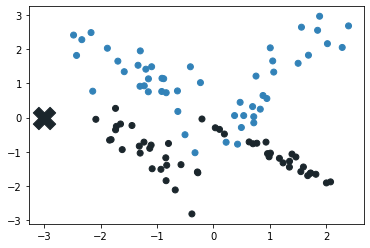

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt

X, y = make_classification(n_features=2, n_redundant=0)

model = KNeighborsClassifier()
model.fit(X, y)

point = np.array([[-3, 0]])
pred = model.predict(point)

# convert to nice colors
colors = ['#1b262c' if i == 0 else '#3282b8' for i in y]
pcolor = '#1b262c' if pred == 0 else '#3282b8'

plt.scatter(X[:, 0], X[:, 1], c=colors)
plt.scatter(point[:, 0], point[:, 1], c=pcolor, s=500, marker='X')
plt.show()

Another useful function for classification estimators is to predict the probability of each class.  KNN is a good model to start with as it is easy to understand and does not take much time to train.  However care must be taken since it can be difficult to to properly tune K, this model is also particularly sensitive to dimensionality.

In [13]:
model.predict_proba(point)

array([[0.6, 0.4]])

## GaussianNB
The naive bayes algorithm is based on bayesian averages, this is a way of estimating the mean using outside information.  A common use for this is to adjust ratings for ranked items, this way if you have a movie on IMDB with a single score 5 stars, it will not show that it is higher than a movie with a million scores of 4.  Pretty much any software that display a list or rank of items will use some form of bayesian averaging, here is a simple version that would take the number of votes an item has into account.  Essentially what this does is make something with nearly no votes converge to the mean, then additional votes will pull it either up or down.

 * ba = ((avg num votes \* avg rating) + (num votes \* score)) / (avg num votes + num votes)

In sklearn there is a group of classifiers that utilize a naive implementation of the bayes algorithm,  they are said to be naive becuase they assume that no relationship between features exist.  These estimators simply look each input (individually) and compare to the output, a probability is calculated for each and then combined.  For example, lets say you have two possible output labels 'ramen','fries', and the inputs 'salt_content', 'spice_amount'.  I'm simplifying it a bit here, but if something has a high salt level and a low spice level it is likely 'fries', while if it had a high spice level it would be ramen.

* 'salt' (0.8) + 'spice' (0.2) = 'fries'

This model is very fast and is not sensitive to irrelevant features, however since it assumes that features are independant it can lead to poor accuracy.

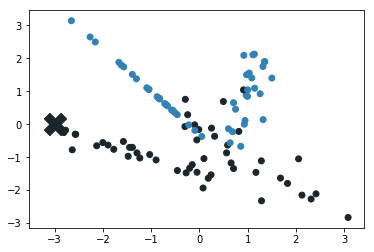

In [248]:
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt

X, y = make_classification(n_features=2, n_redundant=0)

model = GaussianNB()
model.fit(X, y)

point = np.array([[-3, 0]])
pred = model.predict(point)

# convert to nice colors
colors = ['#1b262c' if i == 0 else '#3282b8' for i in y]
pcolor = '#1b262c' if pred == 0 else '#3282b8'

plt.scatter(X[:, 0], X[:, 1], c=colors)
plt.scatter(point[:, 0], point[:, 1], c=pcolor, s=500, marker='X')
plt.show()

## Decision Tree
The decision tree estimator works exactly like trees that you have used in the past, at each node an if / else decision is made based on the relationship between input and output features.  These estimators are great due to the fact that they are easy to understand and don't need data preparation, however they are senstive to outliers and have a tendency to memorize the training data.

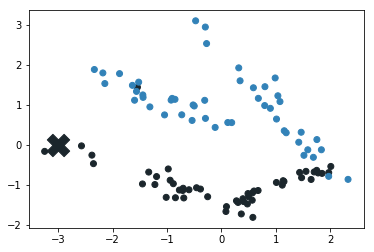

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt

X, y = make_classification(n_features=2, n_redundant=0)

model = DecisionTreeClassifier()
model.fit(X, y)

point = np.array([[-3, 0]])
pred = model.predict(point)

# convert to nice colors
colors = ['#1b262c' if i == 0 else '#3282b8' for i in y]
pcolor = '#1b262c' if pred == 0 else '#3282b8'

plt.scatter(X[:, 0], X[:, 1], c=colors)
plt.scatter(point[:, 0], point[:, 1], c=pcolor, s=500, marker='X')
plt.show()

### SVC (Support Vector Machine)
SVMs are able to make predictions by constructing a hyper-plane(s) which is then used for classification tasks.  A hyper-plane is an n-1 dimensional subspace, for example in 3d space its hyper-plane would be 2d.  In this example the space is 2d to its hyper-plane is 1d (a line).  These models work great in high dimensional spaces, however they are difficult to tune properly and only work well with binary classification.

<img src="images\svm.png" width=400/>

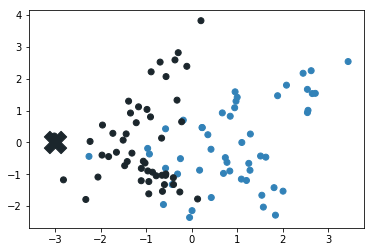

In [4]:
from sklearn.svm import SVC
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt

X, y = make_classification(n_features=2, n_redundant=0)

model = SVC()
model.fit(X, y)

point = np.array([[-3, 0]])
pred = model.predict(point)

# convert to nice colors
colors = ['#1b262c' if i == 0 else '#3282b8' for i in y]
pcolor = '#1b262c' if pred == 0 else '#3282b8'

plt.scatter(X[:, 0], X[:, 1], c=colors)
plt.scatter(point[:, 0], point[:, 1], c=pcolor, s=500, marker='X')
plt.show()

# OK
There are many more classification algorithms in sklearn, each of them are best under specific circumstances.  Once you have identified that you are doing a classification problem you can test different classifiers to see which one scores better and use that one for your predictions, an important part of this is utilizing metrics and visualizations to get a good idea of what is happening.  There are many things that we are being naive about for now, through the class we employ more sophisticated techniques.